Project: Netflix Revenue

This project focuses on analyzing Netflix's revenue and susbscription membership data from 2019 to 2024.
Our Goal is to explore
: Global revenue growth over time
: identify which region is performing best in terms of revenue and membership
: which regions may need more focus

step 1: to read our csv file and perform operation like shape, columns, description about data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("netflix_revenue_updated.csv")
print(df)
print(df.columns)
print(df.head(4))

         Date  Global Revenue  UCAN Streaming Revenue  EMEA Streaming Revenue  \
0  31-03-2019      4520992000              2256851000              1233379000   
1  30-06-2019      4923116000              2501199000              1319087000   
2  30-09-2019      5244905000              2621250000              1428040000   
3  31-12-2019      5467434000              2671908000              1562561000   

   LATM Streaming Revenue  APAC Streaming Revenue  UCAN Members  \
0               630472000               319602000      66633000   
1               677136000               349494000      66501000   
2               741434000               382304000      67114000   
3               746392000               418121000      67662000   

   EMEA  Members  LATM Members  APAC Members  UCAN ARPU  EMEA ARPU  \
0       42542000      27547000      12141000      11.45      10.23   
1       44229000      27890000      12942000      12.52      10.13   
2       47355000      29380000      14485000    

Here some of the operations we are performing:
: df.columns = will give names of all columns
: df.head = will give default 5 rows and df.head(10)
: df.shape = will give idea about rows and columns

In [ ]:
print(df.shape)
print(df.describe)
print(df.columns)

step 2:Data cleaning

Now we are checking is our data include any null values.
This is necessary to do so because ML models can't analysis dataset of null values, so from chance of error it is better to handle

In [ ]:
print(df.isnull().sum())
# luckily now null values as sum counting to zero

Date                              0
Global Revenue                    0
UCAN Streaming Revenue            0
EMEA Streaming Revenue            0
LATM Streaming Revenue            0
APAC Streaming Revenue            0
UCAN Members                      0
EMEA  Members                     0
LATM Members                      0
APAC Members                      0
UCAN ARPU                         0
EMEA ARPU                         0
LATM  ARPU                        0
APAC  ARPU                        0
Netflix Streaming Memberships     0
dtype: int64


converting date format to have good readibility

In [13]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)
print(df['Date'])

0    2019-03-31
1    2019-06-30
2    2019-09-30
3    2019-12-31
4    2020-03-31
5    2020-06-30
6    2020-09-30
7    2020-12-31
8    2021-03-31
9    2021-06-30
10   2021-09-30
11   2021-12-31
12   2022-03-31
13   2022-06-30
14   2022-09-30
15   2022-12-31
16   2023-03-31
17   2023-06-30
18   2023-09-30
19   2023-12-31
20   2024-03-31
Name: Date, dtype: datetime64[ns]


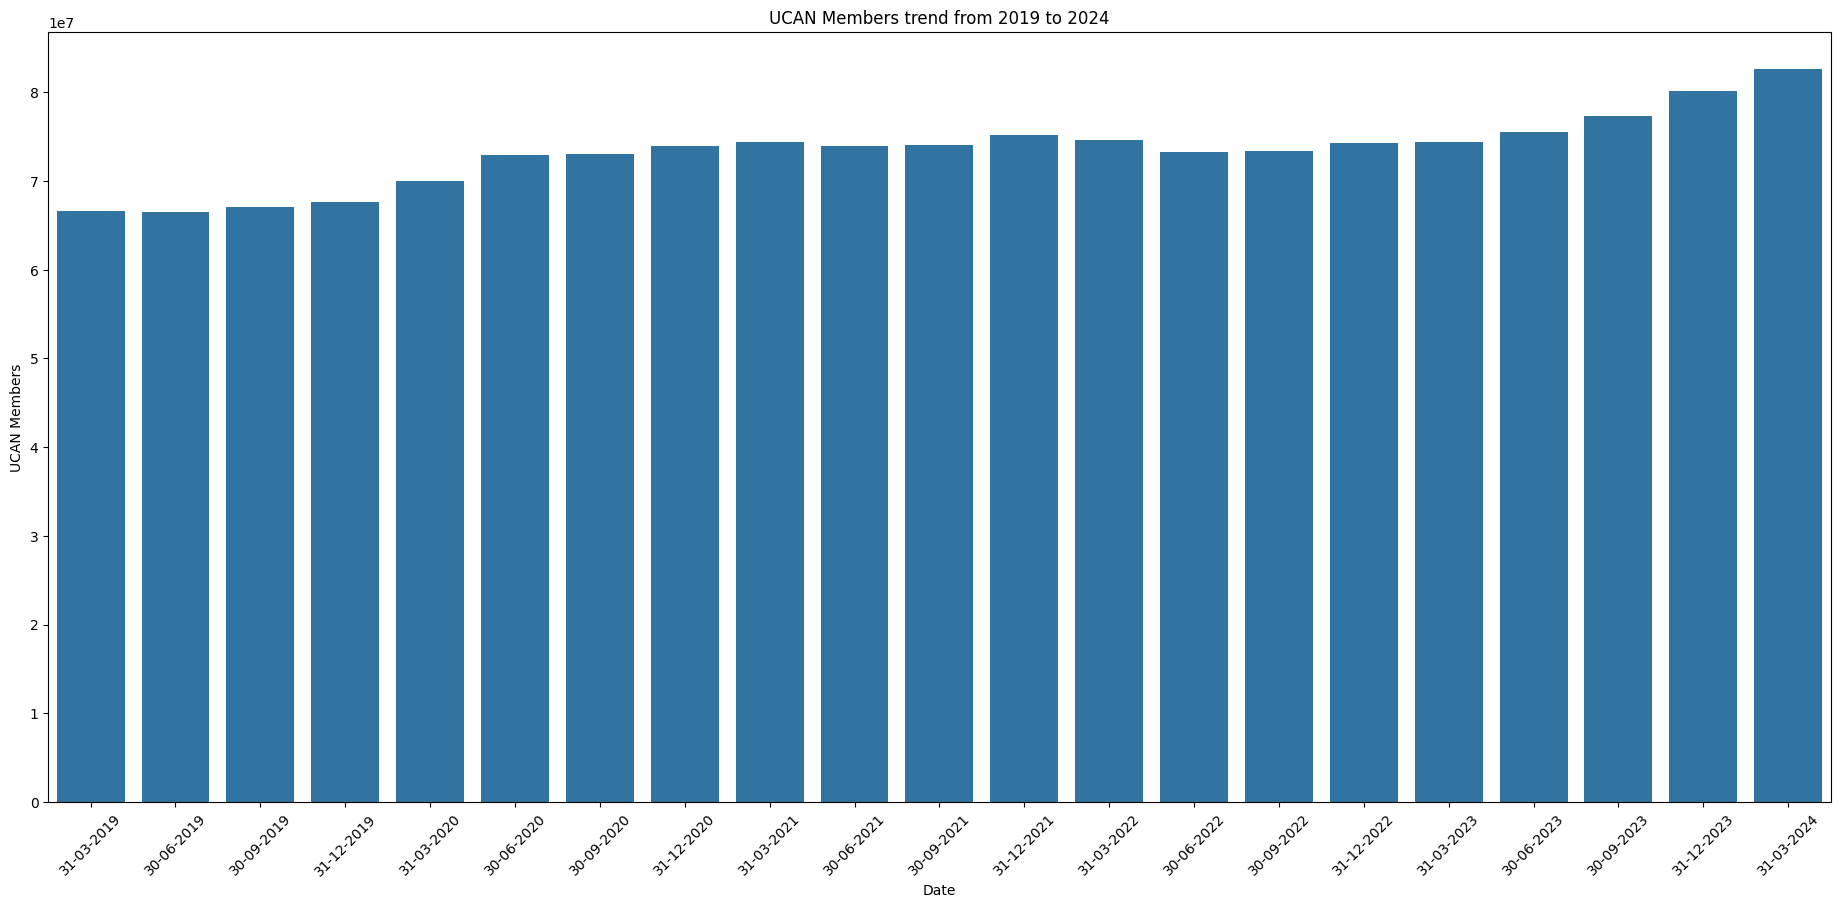

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(23,10))
sns.barplot(data=df,x='Date',y='UCAN Members')
plt.ylabel("UCAN Members")
plt.xlabel("Date")
plt.title("UCAN Members trend from 2019 to 2024")
plt.xticks(rotation=45)
plt.show()

This bar plot shows a steady increase in UCAN members from early 2019 to early 2024.

In [5]:
n1= df['APAC Streaming Revenue'].sum()
n2= df['EMEA Streaming Revenue'].sum()
n3= df['LATM Streaming Revenue'].sum()
n4= df['UCAN Streaming Revenue'].sum()

Text(0.5, 1.0, 'streaming revenue share by region')

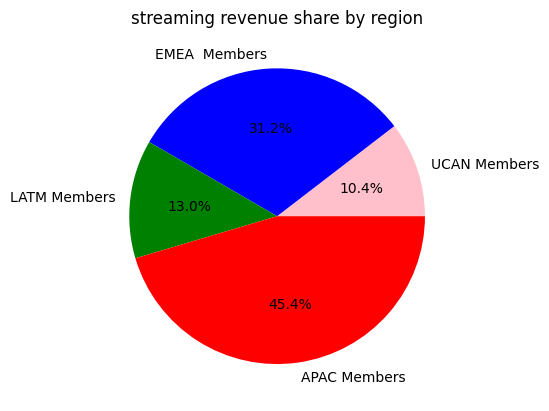

In [6]:
members=['UCAN Members','EMEA  Members','LATM Members','APAC Members']
numbers= [n1,n2,n3,n4]
plt.pie(numbers, labels=members,colors=['pink','blue','green','red'],autopct='%1.1f%%')
plt.title('streaming revenue share by region')

What this pie plot giving information about?
This shows that APAC generated most streaming revenue from 2019 to 2024, while UCAN least.

<Axes: xlabel='Netflix Streaming Memberships ', ylabel='Density'>

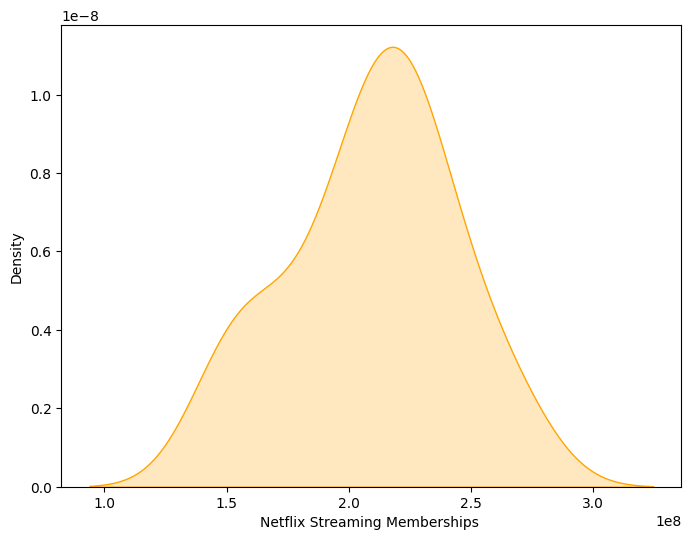

In [62]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['Netflix Streaming Memberships '],color='orange',fill=True)


above plot gave us idea about the higher our curve is, more common that number is

<Axes: xlabel='Date', ylabel='Global Revenue'>

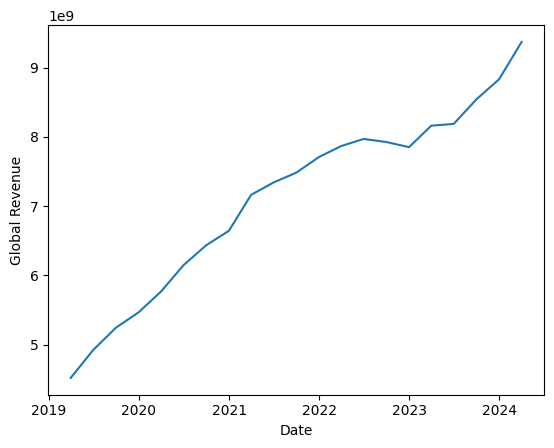

In [61]:
sns.lineplot(data=df,x='Date',y='Global Revenue')


This line plot gave us idea about how global revenue is incraesimg over years

Text(0.5, 1.0, 'Netflix Streaming vs Global Revenue')

<Figure size 800x400 with 0 Axes>

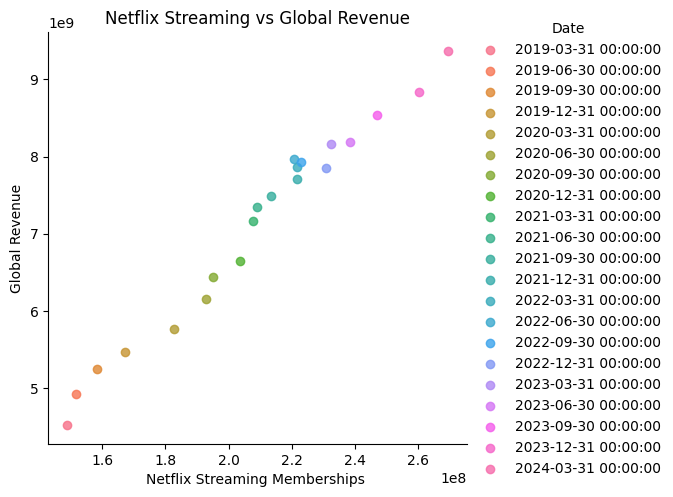

In [67]:
plt.figure(figsize=(8,4))
sns.lmplot(data=df,x='Netflix Streaming Memberships ',y='Global Revenue',hue='Date')
plt.title('Netflix Streaming vs Global Revenue')

This is regression plot that helps us detect trends.
So, this positive trend line indicates that as the number of streaming memberships increases, the global revenue also increases.